In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the movie dataset and create their dataframes

car_df = pd.read_csv('automobile.txt', sep=',')
# Check shape
print(car_df.shape)
car_df.head()


(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning
#### **Clean the data. Identify columns that are redundant or unnecessary.**
I willbe focusing on data which is relevant to my analysis. Remove the following columns ['symboling', 'normalized-losses', 'aspiration', 'num-of-doors', 'engine-location', 'length', 'width', 'height', 'curb-weight', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'num-of-cylinders', 'fuel-system'] from the data set as they will not be used in the analysis.

In [8]:
# remove irrelevant columns

car_updated_df = car_df.drop(['symboling', 'normalized-losses', 'aspiration', 'num-of-doors', 'engine-location',
                              'length', 'width', 'height', 'curb-weight', 'fuel-system', 'bore', 'stroke', 
                              'compression-ratio', 'num-of-cylinders', 'fuel-system', 'peak-rpm', 'wheel-base'],
                              axis=1)
# check new shape
print(car_updated_df.shape)
# Look at top 5 rows
car_updated_df.head()


(205, 10)


,make,fuel-type,body-style,drive-wheels,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,convertible,rwd,dohc,130,111,21,27,13495
1,alfa-romero,gas,convertible,rwd,dohc,130,111,21,27,16500
2,alfa-romero,gas,hatchback,rwd,ohcv,152,154,19,26,16500
3,audi,gas,sedan,fwd,ohc,109,102,24,30,13950
4,audi,gas,sedan,4wd,ohc,136,115,18,22,17450


#### Remove any duplicate rows

In [9]:
# remove duplicate rows
car_updated_df.drop_duplicates()
# Check the shape
print(car_updated_df.shape)

(205, 10)


Some cars in the database have some information missing. The percentage of missing data is small(less than 5%). Such entries can be discarded from the dataframe.

In [11]:
# Replace ? with NaN
car_updated_df = car_updated_df.replace('?',np.NaN)
# Find columns with missing values
car_updated_df.isna().sum()

make            0
fuel-type       0
body-style      0
drive-wheels    0
engine-type     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
dtype: int64

In [16]:
# Change NaN to zero.
car_updated_df['horsepower'] = car_updated_df['horsepower'].fillna(0)
car_updated_df['price'] = car_updated_df['price'].fillna(0)
# Return the non zero rows
car_updated_df = car_updated_df[(car_updated_df[['horsepower','price']] != 0).all(axis=1)]
# check the new shape
print(car_updated_df.shape)

(199, 10)


In [17]:
# Check data type of columns
car_updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          199 non-null    object
 1   fuel-type     199 non-null    object
 2   body-style    199 non-null    object
 3   drive-wheels  199 non-null    object
 4   engine-type   199 non-null    object
 5   engine-size   199 non-null    int64 
 6   horsepower    199 non-null    object
 7   city-mpg      199 non-null    int64 
 8   highway-mpg   199 non-null    int64 
 9   price         199 non-null    object
dtypes: int64(3), object(7)
memory usage: 17.1+ KB


#### For easier handling of data, it is best that they are in a form that is easy to manipulate.
Change the horsepower and price column to interget type (int64)

In [80]:
# change horsepower to int type
car_updated_df['horsepower'] = car_updated_df['horsepower'].apply(np.int64)
# change price to int type
car_updated_df['price'] = car_updated_df['price'].apply(np.int64)

## Data Exploration
Identify relationships to explore between the features(columns)

#### what is the average horsepower based on body style. Are convertables the fastest?

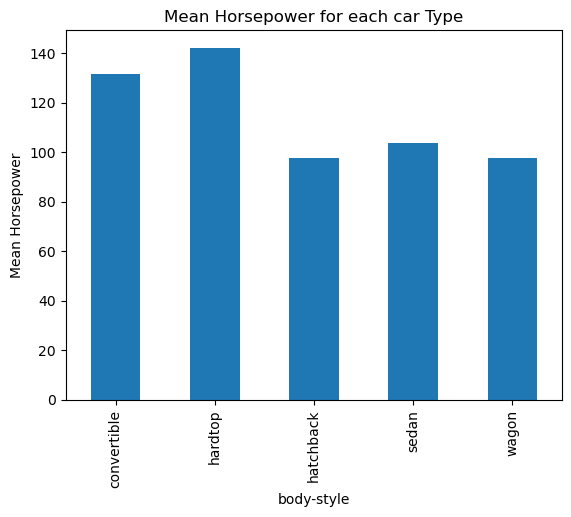

In [92]:
# Calculate average horsepower
avg_horsepower = car_updated_df.groupby('body-style')['horsepower'].mean()
#plot graph
avg_horsepower.plot(kind='bar')
plt.ylabel('Mean Horsepower')
plt.title('Mean Horsepower for each car Type')
# Dispay graph
plt.show()

####  Is it more fuel efficient to drive in the city or highway? 

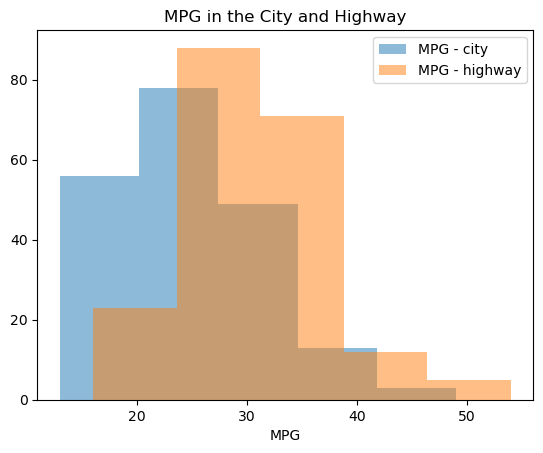

In [34]:
# Plot histograms for MPG in the city and highway
plt.hist(car_updated_df['city-mpg'], bins =5, alpha =0.5, label='MPG - city')
plt.hist(car_updated_df['highway-mpg'], bins=5, alpha =0.5, label='MPG - highway')

# Add legend, title and label
plt.legend(loc='upper right')
plt.xlabel('MPG')
plt.title('MPG in the City and Highway')
# Display graph
plt.show()

#### Which engine size is prefered?

Text(0.5, 1.0, 'Engine sizes')

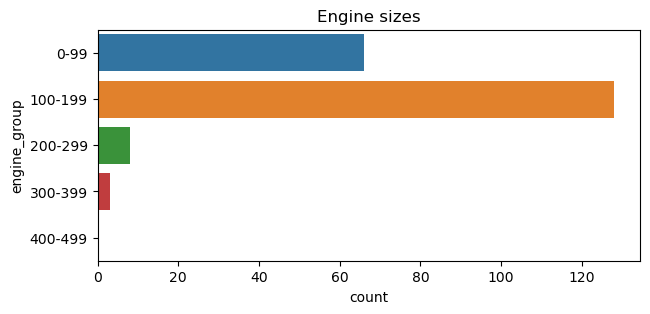

In [144]:
# Create grouping for engine sizes
car_df['engine_group'] = pd.cut(car_df['engine-size'], [0, 100, 200,300, 400,500], 
                   labels=['0-99', '100-199', '200-299','300-399','400-499'
                           ])
# count plot
fig = plt.figure(figsize=(7,3))
sns.countplot(y=car_df['engine_group'], data=car_df);
plt.title('Engine sizes')

#### Which car make is the most expensive and most affordable?

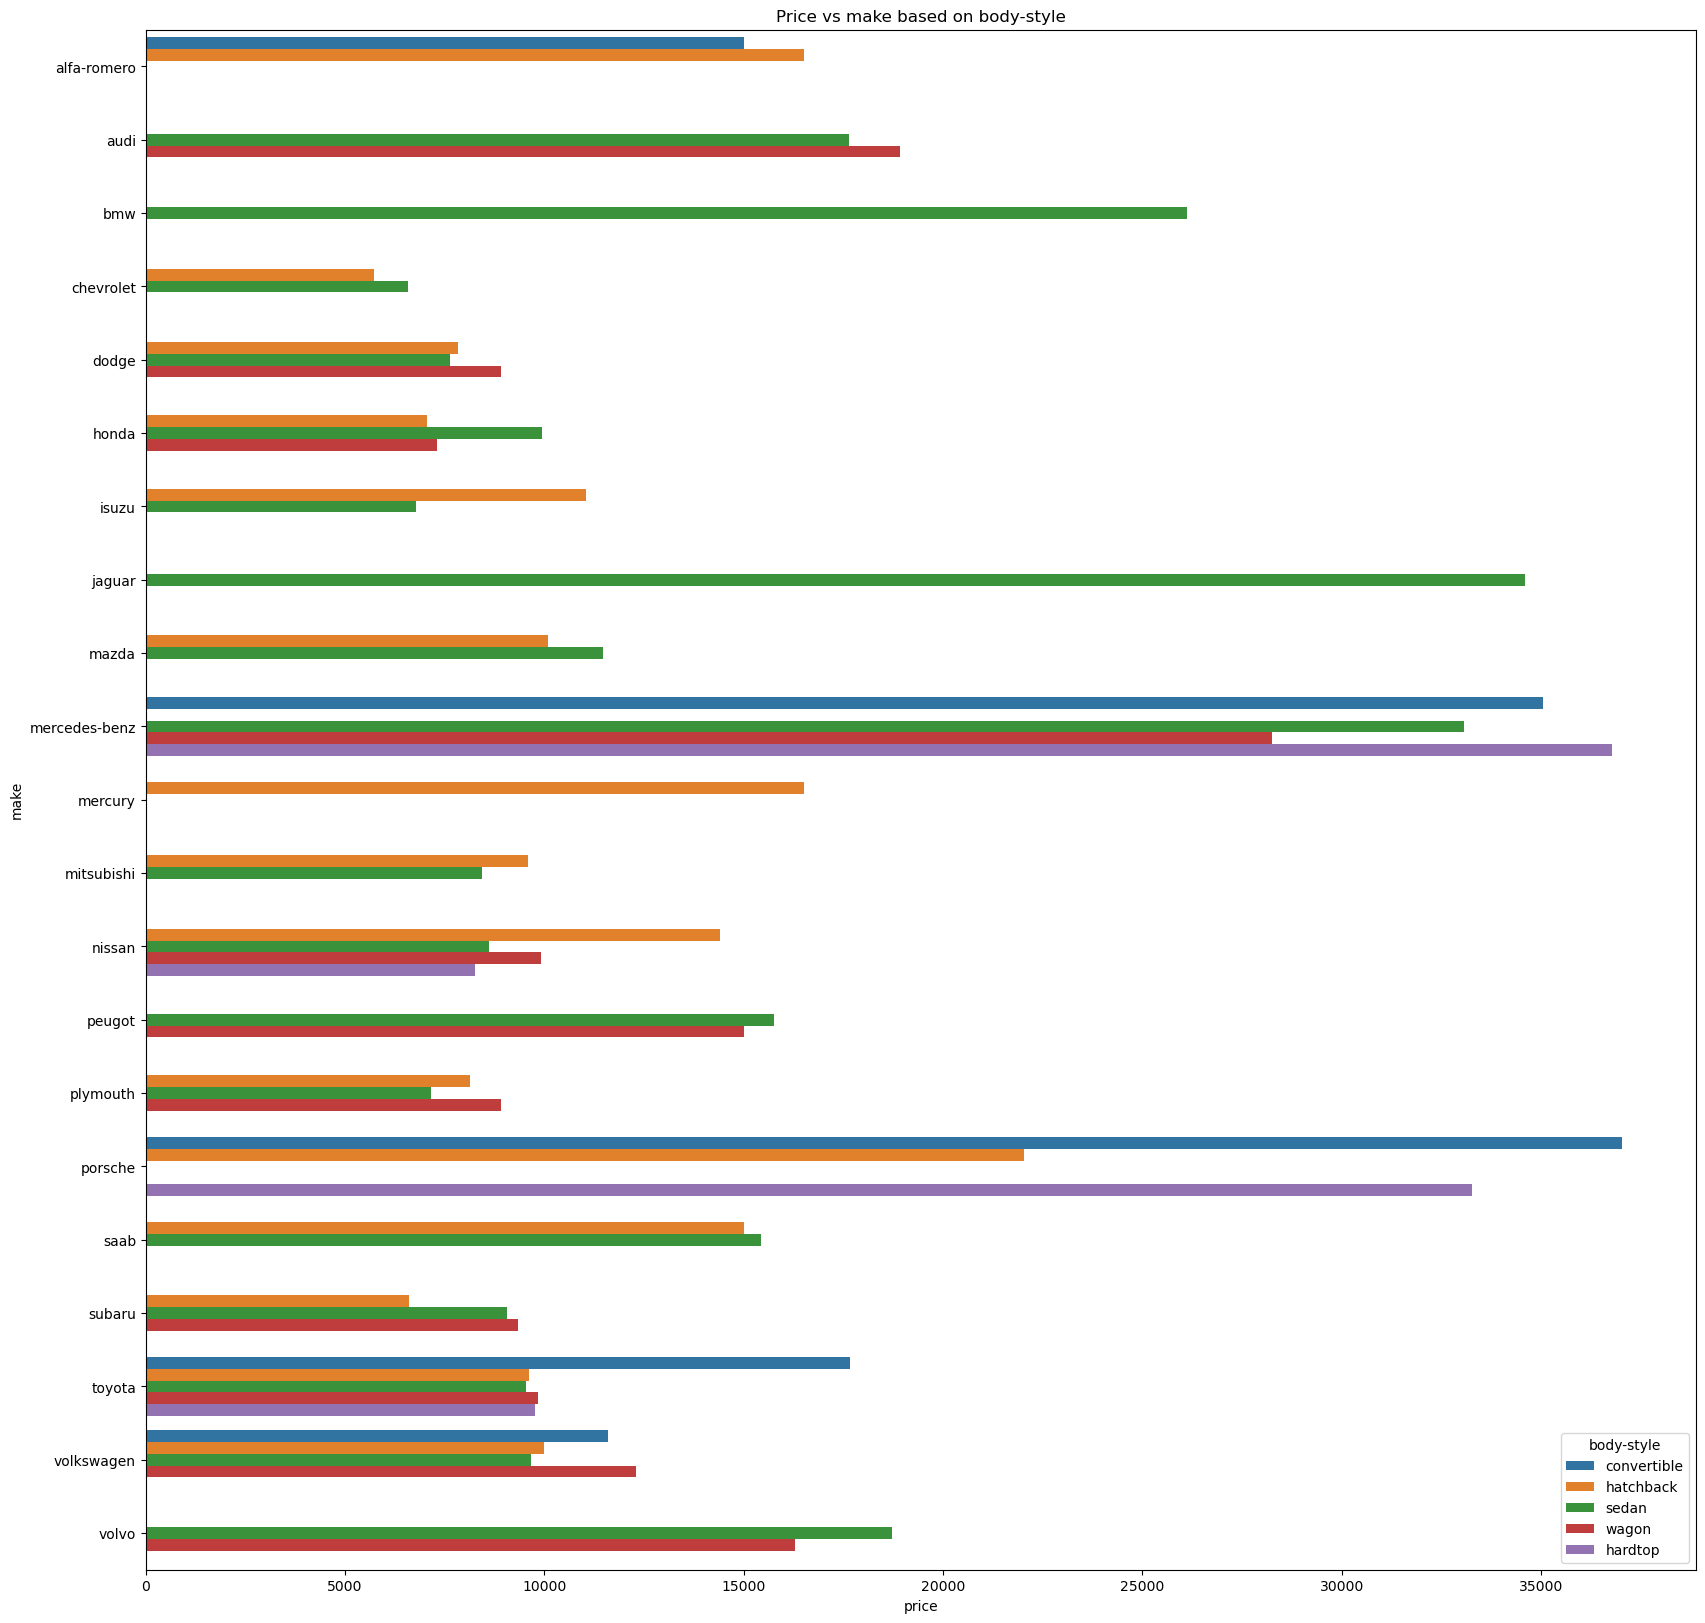

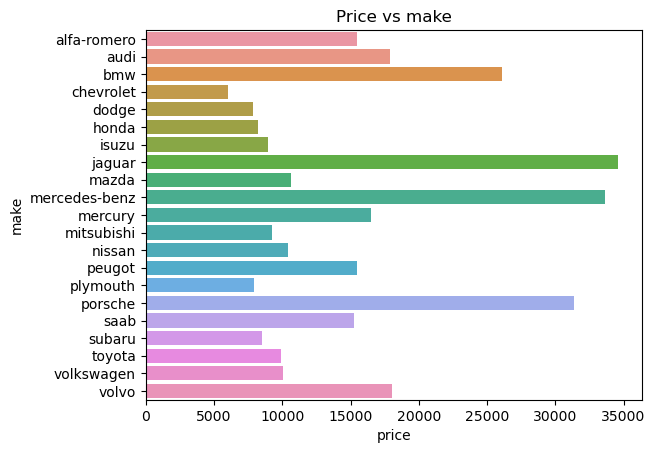

In [143]:
# Create plots to determine most expensive and affordable car make
fig = plt.figure(figsize=(20,20))
sns.barplot(x='price',y='make', data=car_updated_df, hue='body-style', ci=None)
plt.title('Price vs make based on body-style')
plt.show()
sns.barplot(x='price',y='make', data=car_updated_df, ci=None)
plt.title('Price vs make')
plt.show()

#### Which body style is the most popular?

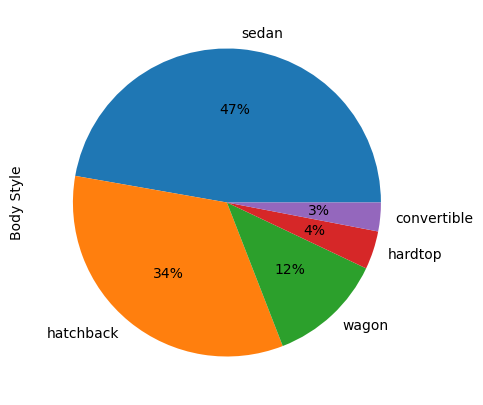

In [138]:
#sns.countplot(x='body-style', data=car_updated_df)
#plt.show()

# Count body styles
style_count = car_updated_df.value_counts('body-style')

# Plot pie chart for different body styles
style_count.plot.pie(subplots=True,figsize=(5, 5), ylabel='Body Style', autopct='%1.0f%%')
#plt.legend(loc='lower left')
plt.show()

#### What is the most common engine type used?

Text(0.5, 1.0, 'Engine types')

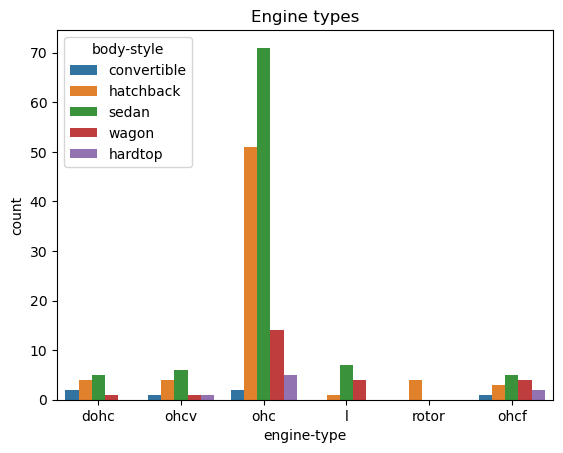

In [142]:
# Create a plot to determine most common engine
sns.countplot(x='engine-type', data=car_updated_df, hue='body-style')
plt.title('Engine types')

#### Does body style affect price?

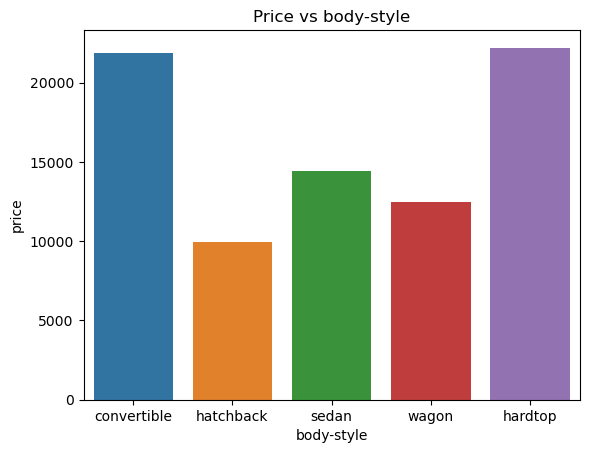

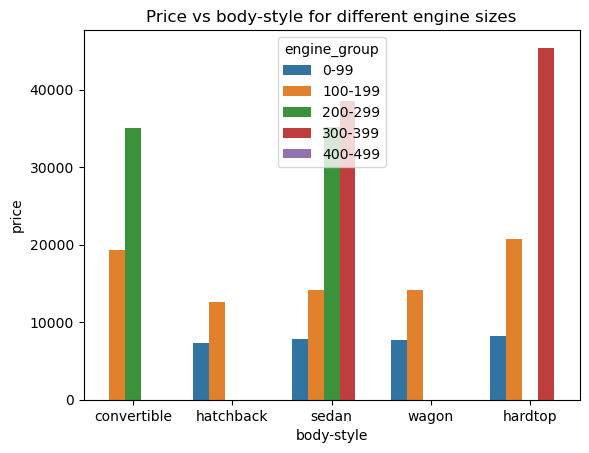

In [141]:
# create plots to deremine body styles effect on price
sns.barplot(x='body-style', y='price', data=car_updated_df, ci=None)
plt.title('Price vs body-style')
plt.show()
sns.barplot(x='body-style', y='price', data=car_updated_df, hue=car_df['engine_group'], ci=None)
plt.title('Price vs body-style for different engine sizes')
plt.show()

#### What is the prefered fuel type?

Text(0.5, 1.0, 'Fuel type based on make')

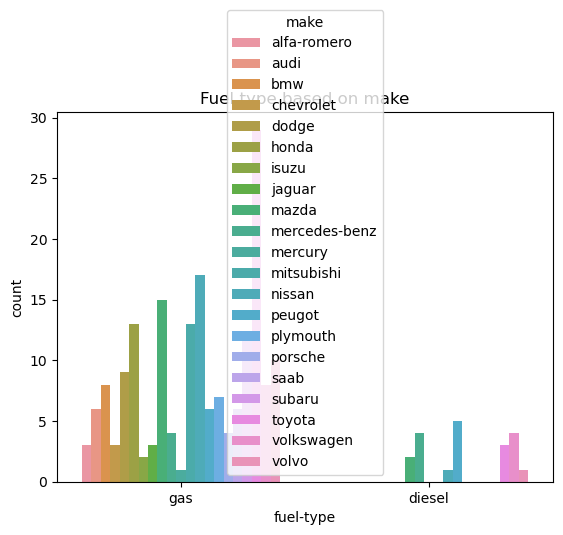

In [139]:
# Create a plot to determine prefered fuel type
# Check if make affects fuel type
sns.countplot(x='fuel-type', data=car_updated_df, hue='make')
plt.title('Fuel type based on make')

Text(0.5, 1.0, 'Fuel type based on body-style')

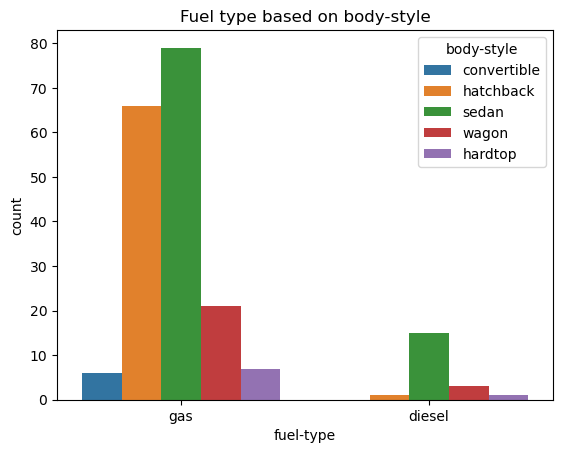

In [140]:
# Create a plot to determine prefered fuel type
# Check if body-style affects fuel type
sns.countplot(x='fuel-type', data=car_updated_df, hue='body-style')
plt.title('Fuel type based on body-style')